# Nearest Neighbor Controller

In [7]:
import numpy as np
import matplotlib as mpl
from NMPC_Net.dataset import dataset as ds
from NMPC_Net.controller import neighbor_controller, utils
from NMPC_Net.simulation import simulation
mpl.rcParams['figure.figsize'] = [10, 10]

In [8]:
X_raw,y = ds.Dataset.load('data/data5-200000.csv')

In [37]:
dataset = ds.Dataset()
initial = dataset._get_rand_x0()
final = dataset._get_rand_xf(initial)

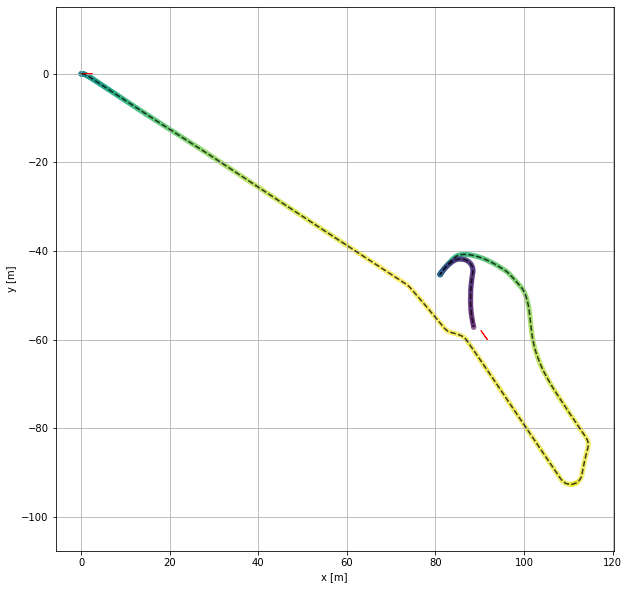

In [38]:
controllerClass = neighbor_controller.NeighborController(X_raw, y)

def controller(initState, targetState):
    return controllerClass.getControl(initState.T, targetState.T, headingWeight=100.0)

sim = simulation.Simulation(
    initial,
    final,
    15.0,
    controller,
    stop_r=2.0)

sim.run_simulation(50.0, quiet=True)
simulation.plot_path(sim, fileName="nearest-neighbor-example.png")

In [35]:
a1 = np.pi
a2 = -1*np.pi/2
a = a1 - a2
np.abs(np.mod((a + np.pi),np.pi*2)) - np.pi

-1.5707963267948966

In [ ]:
controller(np.array([0,0,0,0], dtype=np.double), np.array([0,-30,0,0], dtype=np.double))

In [ ]:
init = np.array([0.0, 0, 0, 0])
final = np.array([10.0, 0, 0, 0])
initRelative, finalRelative = utils.absoluteToRelative(init, final)
utils.plotAbsolute(init, final)
utils.plotRelative(initRelative, finalRelative)